No. | Question
:-:|:-
1 | Do members often spend more at the supermarket than those that are normal?
2 | Which payment method yields an average high purchase rate?
3 | What are the top 3 cities that yield the most gross profit?
4 | Who are most likely to be customers of certain category spenders?
5 | Which category type yields the most income and most unit amount?
6 | Do members spend more than normal status?
7 | What is each city's female to male rate?
8 | What is each city's member to normal rate?
9 | What is the average time of each product line purchase?
10| Is there a correlation of payment method with customer type and time?

In [39]:
import pandas

# pandas.options.display.max_columns = None
# pandas.options.display.max_rows = None

Supermarket_path = pandas.read_csv("supermarket_sales.csv")
Supermarket_path

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [40]:
#Do members often spend more at the supermarket than those that are normal?
members=Supermarket_path[Supermarket_path["Customer type"]=="Member"]
member_avg=members["Total"].mean()
normal=Supermarket_path[Supermarket_path["Customer type"]=="Normal"]
normal_avg=normal["Total"].mean()
Result=member_avg>normal_avg
Result

True

In [41]:
#Which payment method yields an average high quantity rate?
q2_info=Supermarket_path["Payment"].unique()
payment=q2_info[0]
for i in range(0,len(q2_info)):
    if((Supermarket_path[ Supermarket_path["Payment"]==q2_info[i]]["Quantity"].mean())>(Supermarket_path[ Supermarket_path["Payment"]==payment]["Quantity"].mean())):
        payment=q2_info[i]
payment

'Credit card'

In [42]:
#What is the top city that yield the most gross profit?
q3_info=Supermarket_path["City"].unique()
gross_profit=q3_info[0]
for i in range (0, len(q3_info)):
    if((Supermarket_path[Supermarket_path["City"]==q3_info[i]]["gross income"].mean())>(Supermarket_path[Supermarket_path["City"]==gross_profit]["gross income"].mean())):
        gross_profit=q3_info[i]
gross_profit

'Naypyitaw'

In [43]:
# Who are most likely to be customers of certain category spenders?
import statistics
categories=Supermarket_path["Product line"].unique()
customers=Supermarket_path["Customer type"].unique()
result={}
for i in range(0, len(categories)):
    info=statistics.mode(Supermarket_path[Supermarket_path["Product line"]==categories[i]]["Customer type"])
    result[categories[i]]=info
result
    

{'Health and beauty': 'Normal',
 'Electronic accessories': 'Normal',
 'Home and lifestyle': 'Member',
 'Sports and travel': 'Member',
 'Food and beverages': 'Member',
 'Fashion accessories': 'Normal'}

In [44]:
# Which category type yields the most income and most unit amount?
categories=Supermarket_path["Product line"].unique()
most_income=categories[0]
most_unit=categories[0]
for i in range(0,len(categories)):
    if(Supermarket_path[Supermarket_path["Product line"]==categories[i]]["gross income"].mean()>Supermarket_path[Supermarket_path["Product line"]==most_income]["gross income"].mean()):
        most_income=categories[i]
    if(Supermarket_path[Supermarket_path["Quantity"]==categories[i]]["Quantity"].mean()>Supermarket_path[Supermarket_path["Quantity"]==most_unit]["Quantity"].mean()):
        most_unit=categories[i]
result={
    "Most Income":most_income,
    "Most Unit" : most_unit
}
result
# info

{'Most Income': 'Home and lifestyle', 'Most Unit': 'Health and beauty'}

In [45]:
# Do members spend more than normal status?
customers=Supermarket_path["Customer type"].unique()
customers
if(Supermarket_path[Supermarket_path["Customer type"]=="Member"]["Total"].mean()>Supermarket_path[Supermarket_path["Customer type"]=="Normal"]["Total"].mean()):
    print(True)
else:
    print(False)

True


In [46]:
# What is each city's female to male rate?
q7_info={}
Cities=Supermarket_path["City"].unique()
for i in range(0,len(Cities)):
    result=Supermarket_path[Supermarket_path["City"]==Cities[i]]
    fem_data=result[result["Gender"]=="Female"]["Gender"].count()
    male_data=result[result["Gender"]=="Male"]["Gender"].count()
    q7_info[Cities[i]]=str(fem_data)+"/"+str(male_data)
q7_info
    




{'Yangon': '161/179', 'Naypyitaw': '178/150', 'Mandalay': '162/170'}

In [47]:
#What is each city's member to normal rate?
q8_info={}
Cities=Supermarket_path["City"].unique()
for i in range(0,len(Cities)):
    result=Supermarket_path[Supermarket_path["City"]==Cities[i]]
    member_data=result[result["Customer type"]=="Member"]["Customer type"].count()
    normal_data=result[result["Customer type"]=="Normal"]["Customer type"].count()
    q8_info[Cities[i]]=str(member_data)+"/"+str(normal_data)
q8_info

{'Yangon': '167/173', 'Naypyitaw': '169/159', 'Mandalay': '165/167'}

In [48]:
#What is the most common time of each product line purchase?
q9_info={}
products=Supermarket_path["Product line"].unique()
for i in products:
    time=statistics.mode(Supermarket_path[Supermarket_path["Product line"]==i]["Time"])
    q9_info[i]=time
q9_info

{'Health and beauty': '14:42',
 'Electronic accessories': '18:22',
 'Home and lifestyle': '11:26',
 'Sports and travel': '13:05',
 'Food and beverages': '20:29',
 'Fashion accessories': '19:39'}

There are not much correlation as the values are closer to 0
                Payment  Customer type      Time
Payment        1.000000       0.018073  0.045903
Customer type  0.018073       1.000000 -0.020162
Time           0.045903      -0.020162  1.000000


<AxesSubplot:>

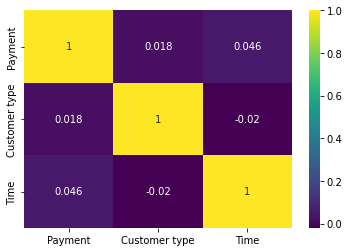

In [65]:
#Is there a correlation of payment method with customer type and time?
import numpy as np
import seaborn as sns
df=pandas.DataFrame({
    'Payment':Supermarket_path["Payment"],
    'Customer type':Supermarket_path["Customer type"],
    'Time':Supermarket_path["Time"]
})
df["Payment"]=df["Payment"].astype('category').cat.codes
df["Customer type"]=df["Customer type"].astype('category').cat.codes
df["Time"]=df["Time"].astype('category').cat.codes
print("There are not much correlation as the values are closer to 0")
print(df.corr())
sns.heatmap(df.corr(),annot=True,cmap='viridis')
# df

# np.corrcoef(paymentmethod,customertype)
